## 도형그리기
- 각 함수들은 원본 이미지에 도형을 그린다.
- cv2.line(img, pt1, pt2, color, tickness=None, lineType=None, shift): img
    - 선그리기
    - 매개변수
        - img: 그릴 대상 이미지
        - pt1, pt2: 직선의 시작/끝점. 각각 튜플(x, y) -> 이미지 y축은 내려갈수록 커짐. x축은 동일
        - color: 선 색 또는 밝기 (B,G,R) 튜플 또는 정수. 흑백모드일 때는 상수 주면 됨
        - thickness: 선 두께. 기본값=1 (픽셀)
        - lineType: 선 타입. cv2.LINE_4, cv2.LINE_8(기본값), cv2.LINE_AA(부드러운 형태) 중 선택. 일직선이 아니면 LINE_AA를 준다.
        - shift: 그리기 좌표값의 축소 비율. 기본값=0 일반적으로는 쓸일 없다.
    - 반환값
       - 선을 그린 image (ndarray) 반환 (모든 도형함수 동일)

- cv2.rectangle(img, pt1, pt2, color, thickness=None, lineType=None, shift=None): img
- cv2.rectangle(img, rec, color, thickness=None, lineType=None, shift=None):img
    - objection detection에서도 사용. 사진에서 물체가 어느 위치에 있는지 찾고 박스를 표시할 좌표를 찾을 때. ML/DL에서는 네 좌표를 직접 찾음. objecction detection은 위치와 뭔지 둘 다 찾아야 함(회귀+분류 둘 다 하는 것)
    - 사각형 그리기
    - 매개변수
        1. pt1, pt2: 좌측상단(xmin, ymin), 우측하단(xmax, ymax) 좌표. 튜플 (x, y)
        2. rec: 사각형의 위치정보(x, y, w, h) 튜플 지정. (x,y): 사각형 **좌측상단**의 좌표. objection detection은 center 좌표
        - thickness: 도형에서는 -1을 주면 내부를 채운다. 


- cv2.circle(img, center, radius, color, thickness=None, lineStyle=None, shift): img
    - 원 그리기. 원의 lineType은 LINE_AA (안티 알리애싱)을 주면 부드럽게 그려진다. 
    - 매개변수
        - center: 원의 중심좌표. 튜플 (x,y)
        - radius: 반지름

- CV2.polylines(img, pts, isClosed, color, thinkness=None, lineType=None, shift=None): img
    - 다각형을 그린다.
    - 매개변수
        - pts: 다각형의 외곽점들의 좌표배열. ndarray 리스트 (ex: \[np.array[[10,10],[50,50], [10,10]])\] => 리스트로 감싸서 2차원 배열로 넣는다.
        - isClosed: bool. 폐곡선 여부. 시작점과 끝점을 연결할지 여부.

- cv2.putText(img, text, org, fontFace, fontScale, color, thickness=None, lineType=None, bottomLeftOrigin=None): img
    - 문자열을 출력. 영문/숫자만 지원(한글 지원안함.)
    - 매개변수
        - text: 출력할 문자열
        - org: 이미지에서 문자열을 출력할 위치. **문자열의 좌측하단**의 좌표를 튜플로 지정 (x,y)
        - fontFace: 폰트 종류. cv2.FONT_HERSHEY_ 로 시작하는 상수 중 선택
        - fontScale: 폰트 크기 확대/축소 비율. 1이 기본. 1을 기준으로 정한다.
        - bottomLeftOrigin: bool. True이면 이미지의 좌측하단을 원점으로 간주. 거의 기본값 사용.

In [25]:
import cv2
import numpy as np

img = np.full(shape=(400,400,3), fill_value=255, dtype=np.uint8) # 흰색 이미지. 컬러모드

cv2.line(img, (50,50), (200,50), (0,0,255), 5)  # (50,50): 시작좌표(x,y), (200,50): 끝좌표, (0,0,255): 선 색(B,G,R), 5: 선 두께
cv2.line(img, (50,50), (150,150), (0,0,128), 3) # 두께 생략: 1

# 사각형
cv2.rectangle(img, (50,200), # 좌상단 (xmin, ymin)
              (300,350), # 우하단(xmax, ymax)
              color=(255,0,0))
cv2.rectangle(img, (200, 200, 50, 150), # (좌상단 x, y, width, height)
              color=(0,255,0),
              thickness=-1) # 두께: -1: 색을 채운다

# 원
cv2.circle(img, (300,100), # center x, y
           30, # 반지름
           (255,255,0), # color
           -1, # 두께: -1: 채운다
           lineType=cv2.LINE_AA) # 테두리가 계단 형식으로 약간 자글자글함 -> LINE_8이 기본이기 때문에
# 직선이나 사각형일 때는 계단형식이 상관없지만, 원이나 사선의 경우는 부드러운 선이 좋음
cv2.circle(img, (300,100), 60, (255,0,0), 2, lineType=cv2.LINE_AA)

#다각형
pts = np.array([[250,200], # 2차원 배열
               [300,200],
               [350,300],
               [250,300]
               ])  
cv2.polylines(img, [pts],  # 연결할 좌표 2차원배열 리스트로 넣는다
              False, # 시작점과 끝점을 연결할지 여부
              color=(255,0,0), # 선 색
              thickness=2, # 선 두께
              )

# 텍스트
text = 'Hello OpenCV'
# text = '안녕하세요' # opencv 제공 폰트들이 한글 지원 안 함 => 파이썬 라이브러리 중 Pillow을 이용해서 이미지로 만들고 붙여야 하는 복잡한 작업 필요
cv2.putText(img, 
            text, # 이미지에 '그릴' 글자들
            (50,300), # 글씨를 출력할 위치
            cv2.FONT_HERSHEY_SIMPLEX,
            1, # FONT SIZE(글씨 크기)
            (100,100,100), # 색
            2, # 두께
            cv2.LINE_AA
            )

cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# 한글 출력 => Pillow 라이브러리 이용. 디폴트는 안되고 한글을 지원하는 폰트의 경로를 지정해야 함

In [50]:
# Malgun Gothic 폰트 경로 조회
import matplotlib as mpl
import matplotlib.font_manager as fm

font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
print(len(font_list)) # 컴퓨터마다 설치된 폰트 개수 다름
font_list[:5]

382


['C:\\Windows\\Fonts\\msjh.ttc',
 'C:\\Windows\\Fonts\\H2PORM.TTF',
 'C:\\Windows\\Fonts\\bahnschrift.ttf',
 'C:\\Windows\\Fonts\\FRABK.TTF',
 'C:\\Windows\\Fonts\\georgiai.ttf']

In [52]:
malgun_list = [font for font in font_list if 'malgun' in font.lower()]
print(len(malgun_list))
malgun_list

3


['C:\\Windows\\Fonts\\malgunbd.ttf',
 'C:\\Windows\\Fonts\\malgunsl.ttf',
 'C:\\Windows\\Fonts\\malgun.ttf']

In [53]:
font_path = 'C:\\Windows\\Fonts\\malgun.ttf'

In [ ]:
# !pip install Pillow

In [67]:
import numpy as np
from PIL import ImageFont, ImageDraw, Image # 디폴트 대신 한글 다루는 폰트로 변경해야 함
import cv2

img = np.full((400,400,3), fill_value=255, dtype=np.uint8) # 배경

# Pillow를 이용해 이미지에 한글을 출력
# 폰트설정
font = ImageFont.truetype(font_path, 20) # 폰트경로, 폰트크기(기본:10)

# Pillow는 넘파이 배열 다루지 않음. 자체 이미지 포맷 있음
# ndarray(이미지)를 pillow image 형식으로 변환
img_pil = Image.fromarray(img)
draw = ImageDraw.Draw(img_pil) # Image에 글씨를 쓸 수 있는 Draw 형태로 변환. Draw-도형을 그리는 판같은 개념. 그 안에 img를 넣어준 것. txt는 img에 써줌
draw.text((60,70), '안녕하세요. OpenCV입니다.', font=font, fill=(255,0,0)) # fill글씨색 - (R,G,B)형태!
# 이 한글이 쓰여진 이미지를 '원본이미지'로 사용해서 ndarray로 변환할 것. 즉 글씨가 쓰여있는 '이미지'

# Pillow 이미지를 ndarray로 변환(opencv)
img = np.array(img_pil)
# 이미지에 추가작업하려면 이제 img에 설정하면 됨

# 영문 - 이거는 opencv로 쓴 것
cv2.putText(img, 'hello world', (50,150), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0))

cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Lenna Image에 텍스트 그리기

In [40]:
txt = 'Lenna Forsen'
img = cv2.imread('./images/lenna.bmp')
cv2.putText(img, txt, (400,400), cv2.FONT_HERSHEY_SIMPLEX, 1, (100,100,100), 2, cv2.LINE_AA)

array([[[125, 137, 226],
        [125, 137, 226],
        [133, 137, 223],
        ...,
        [122, 148, 230],
        [110, 130, 221],
        [ 90,  99, 200]],

       [[125, 137, 226],
        [125, 137, 226],
        [133, 137, 223],
        ...,
        [122, 148, 230],
        [110, 130, 221],
        [ 90,  99, 200]],

       [[125, 137, 226],
        [125, 137, 226],
        [133, 137, 223],
        ...,
        [122, 148, 230],
        [110, 130, 221],
        [ 90,  99, 200]],

       ...,

       [[ 60,  18,  84],
        [ 60,  18,  84],
        [ 58,  27,  92],
        ...,
        [ 84,  73, 173],
        [ 76,  68, 172],
        [ 79,  62, 177]],

       [[ 57,  22,  82],
        [ 57,  22,  82],
        [ 62,  32,  96],
        ...,
        [ 79,  70, 179],
        [ 81,  71, 181],
        [ 81,  74, 185]],

       [[ 57,  22,  82],
        [ 57,  22,  82],
        [ 62,  32,  96],
        ...,
        [ 79,  70, 179],
        [ 81,  71, 181],
        [ 81,  74, 185]]

In [47]:
txt = 'Lenna Forsen'
# txt = '레나 폴센'

In [56]:
lenna = cv2.imread('./images/lenna.bmp')
lenna_txt = lenna.copy() # 원본 안 바꾸기 위해
cv2.putText(lenna_txt, txt, (50,450), cv2.FONT_HERSHEY_SIMPLEX, 2, color=(255,255,255), thickness=3, bottomLeftOrigin=True) # 글씨가 거꾸로 반전돼서 나옴
cv2.imshow('src', lenna)
cv2.imshow('txt', lenna_txt)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 이미지 Crop
- open cv는 이미지를 numpy의 ndarray를 이용해 연산하기 때문에 image의 특정 영역의 좌표만 알면 그 영역을 잘라낼 수 있다. slicing

In [69]:
lenna = cv2.imread('./images/lenna.bmp')
lenna.shape

(512, 512, 3)

In [73]:
height_s = int(lenna.shape[0]/4) # 시작 height
height_e = height_s*3            # 끝 height
width_s = int(lenna.shape[1]/4) # 시작 width
width_e = width_s*3             # 끝 width
print(height_s, height_e, width_s, width_e) # 4등분 중 1,3번째 좌표를 잡아줌으로써 가운데 잘라내기

128 384 128 384


In [75]:
cropped_lenna = lenna[height_s:height_e, width_s:width_e] # 채널은 3개 다 갖고 옴

In [76]:
cv2.imshow('src', lenna)
cv2.imshow('cropped', cropped_lenna)
cv2.waitKey(0)
cv2.destroyAllWindows()

- 지금까지의 변환은 각각 픽셀값을 조절하는 작업들이었음. **값**을 바꾸는 작업 => **픽셀** 단순계산

## 영상의 기하학적 변환
- 영상을 구성하는 픽셀의 배치 구조를 변경함으로써 전체 영상의 모양을 바꾸는 작업. **값의 위치**를 바꾸는 작업 => 픽셀의 **좌표** 계산
- 이동한 후 빈 공간은 채우는 작업 필요

### 이동 변환 (Translation Transformation) - 덧셈 연산
- 가로 또는 세로 방향으로 영상을 이동시키는 변환
- X축과 Y축 방향으로 이동 변위를 지정
- 그림을 가로(X축) 으로 a 만큼 , 세로(Y축)으로 b만큼 이동할 경우. 원래 자리는 빈 자리
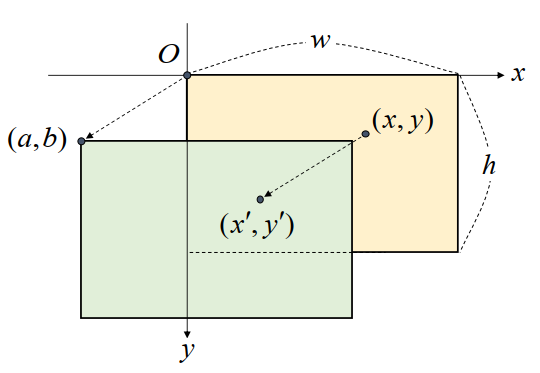

$$
\,각\,좌표들을 (a,b)\,만큼\,더한다.
\large{
    \begin{cases}
    x'=x+a\\
    y'= y+b
    \end{cases}
}
$$

<hr>
$$
행렬곱으로\,표현 - 내적.   
3행으로 만들기 위해 1 넣어준 것\\
\large{
    \begin{bmatrix}
    x'\\
    y
    \end{bmatrix}=
    \begin{bmatrix}
    1 & 0 & a \\
    0 & 1 & b
    \end{bmatrix}
    \cdot
    \begin{bmatrix}
    x\\y\\1
    \end{bmatrix}
}\\
이동을 위한 2\times3\,어파인\,변환\,행렬 \\
\begin{bmatrix}
1 & 0 & a \\
0 & 1 & b
\end{bmatrix}
$$

- 어파인 변환 행렬: 필터링에서 커널과 같은 역할. 실수형
    - 어파인: 더하고 곱하기(곱셈도 덧셈의 일종)를 통해서 값을 만들어내는 것

- cv2.warpAffine(src, M, dsize, dst=None, flags=None, borderMode=None, borderValue=None)
    - 매개변수
        - src: 원본 영상
        - M: $2\times3$ 어파인 변환 행렬. 실수형
        - dsize: 결과 영상의 크기를 (w, h) 튜플로 지정. (0,0) 이면 같은 크기
            - 이미지 크기는 바뀌지만 **이미지 틀(frame)**은 안 바뀜. 안 잘리기 위해 사이즈를 더 키움. 아니면 같은 크기 
        - flags: 보간법 - 상수. opencv에서 정해져 있는 방식들로 빈 공간을 채워라
        - borderModel: 영상이 이동해서 생기는 빈 공간을 채우는 방식. default: cv2.BORDER_CONSTANT (검정색(0)으로 채운다.)
            - borderValue: cv2.BORDER_CONSTANT 일때 채울 색. 0: 검정, 1: 흰색(255)

In [83]:
import cv2
import numpy as np

lenna = cv2.imread('./images/lenna.bmp')
a, b = 100, 200  # a: 가로 이동 범위, b: 세로 이동 범위

# affine 변환 행렬 (2 x 3) - 실수형
aff_matrix = np.array([[1, 0, a],
                       [0, 1, b]], dtype=np.float32) # 행렬은 다 같은 타입이라 하나만 1.0로 줘도 다 바뀜

# img = cv2.warpAffine(lenna, aff_matrix, (0,0)) # 원본의 프레임은 그대로 유지
# img = cv2.warpAffine(lenna, aff_matrix, (1024,1024))
img = cv2.warpAffine(lenna, aff_matrix, (0,0), borderMode=cv2.BORDER_REFLECT101) # 반사형식
# 딥러닝에서는 빈 공간이 학습에 영향을 미치지 않도록 보통 0으로 채움

cv2.imshow('src', lenna)
cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()
# 프레임은 그대로 유지하고, 빈 공간은 border_constant 0으로 채운 것

### 전단 변환(Shear Transformation) - 곱해서 더함
- 직사각형 형태의 영상을 한쪽 방향으로 밀어서 평행사변형 모양으로 변형되는 변환으로 층밀림 변환이라고도 한다. 가로/세로 방향으로 찌그러트리는 형태
    - 한축 방향으로 이동하는데 기준축에 비례해서 다르게 이동한다.
- X축과 Y축에 대해 따로 정의한다. 
- $m$은 비율. 커질수록 많이 찌그러짐
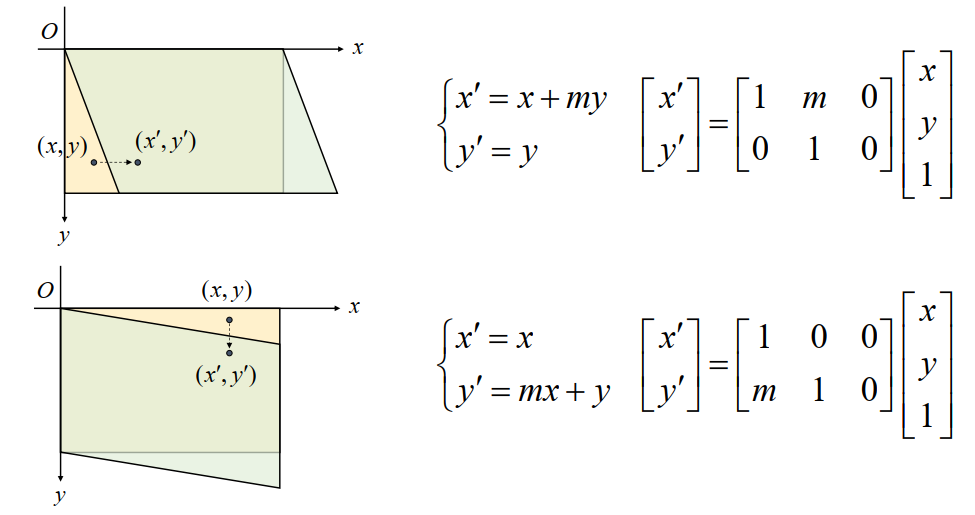
<center>$m$: 비율</center>

In [89]:
lenna = cv2.imread('./images/lenna.bmp')
m = 0.5
aff_matrix = np.array([[1, m, 0],
                       [0, 1, 0]])

aff_matrix2 = np.array([[1, 0, 0],
                        [m, 1, 0]])
                        
# img = cv2.warpAffine(lenna, aff_matrix, (0,0)) # 프레임은 그대로. 빈공간은 마찬가지로 border_mode로 채움
# img2 = cv2.warpAffine(lenna, aff_matrix2, (0,0))

w, h = lenna.shape[1], lenna.shape[0]
img = cv2.warpAffine(lenna, aff_matrix, (w+int(h*m), h))
img2 = cv2.warpAffine(lenna, aff_matrix2, (w, h+int(w*m)))

cv2.imshow('src', lenna)
cv2.imshow('img', img)
cv2.imshow('img2', img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 크기 조절(확대/축소 - Resize)
- 워낙 많이 사용하므로 resize 함수 제공
- cv2.resize(src, dsize\[, fx, fy, interpolation\])
    - 매개변수
        - src: 원본 이미지 
        - dsize: 조절할 이미지 크기 (width, height)
        - fx, fy: 상대적 크기로 지정한다. (dsize는 0,0 으로 설정한다. dsize를 설정하면 dsize가 우선한다.)
        - interpolation: 보간 방법
             - 크기를 조절할 때 본래는 없는 값을 메우는 작업이 필요한데, 이를 interpolation(보간법)이라고 한다.
    - 반환값
        - ndarray: resize된 이미지반환
        
#### Interpolation 상수
- cv2.INTER_NEAREST: 이웃보간법. nearest neighbor interpolation이라고도 하며, 주변 이웃 pixel값을 가져와 빈공간을 채운다. 가장 빠르지만 화질이 좋지 않다. => 계단현상이 심각해서 쓰지 않는 게 좋음
- **cv2.INTER_LINEAR**: 쌍 선형보간법.(2x2 이웃픽셀을 계산해서 만든다.) resize의 default 방식. 연산속도가 빠르고 화질도 좋아서 많이 사용된다.
- cv2.INTER_CUBIC - 바이큐빅 보간법.(4x4 이웃픽셀을 계산해서 만든다.)  INTER_LINEAR보다 화질이 좋고 lancozs보다 계산량이 적어 많이 사용된다.
- cv2.LANCZOS4 - Lanczos보간법.(8x8 이웃픽셀을 계산해서 만든다.) 가장 부드럽게 값을 메우지만 연산이 많이 필요하다.
- 아래로 갈수록 성능이 좋아짐(계단현상 줄어듦). 속도는 느려짐. 사실 별차이 안 나서, INTER_LINEAR 가장 많이 씀   


- **cv2.INTER_AREA**: 영역보간법. 크기를 **축소**할 때 많이 사용한다. 확대할 때는 nearest neighbor와 유사하다.
- 일반적으로 쌍 선형보간법을 많이 쓴다.
    - 이미지 확대: 바이큐빅, 쌍 선형 보간법을 가장 많이 사용
    - 이미지 축소: 영역 보간법을 많이 사용.
    
#### Interpolation 비교
- **upsampling**
    - 이미지 사이즈를 키우는 것 => 나머지 3개. 일반적으로 INTER_LINEAR
    - nearest와 area는 계단현상이 발생
    - linear는 edge가 smooth된 효과가 발생
    - cubic과 lancozs는 edge가 sharpen되는 효과
- **downsampling**
    - 사이즈 줄이는 것 => INTER_AREA 지정
    - area는 pixel 관계에 따라 resampling하기 때문에 상대적으로 부드럽게 변환된다.
    - 나머지는 계단현상이 많이 발생한다.
    - CNN(채널은 늘리면서 이미지는 줄여나감)

In [90]:
rose = cv2.imread('./images/rose.bmp')
rose.shape

(320, 480, 3)

In [97]:
rose_small = cv2.resize(rose, (240, 160), interpolation=cv2.INTER_AREA) # (width, height)
rose_big = cv2.resize(rose, (960, 640), interpolation=cv2.INTER_NEAREST) # 속도는 가장 빠르지만, 계단현상 가장 심함
rose_big2 = cv2.resize(rose, (960, 640), interpolation=cv2.INTER_LINEAR) # 나머지는 시간 여부에 따라 선택
rose_big3 = cv2.resize(rose, (960, 640), interpolation=cv2.INTER_CUBIC)
rose_big4 = cv2.resize(rose, (960, 640), interpolation=cv2.INTER_LANCZOS4)

cv2.imshow('src', rose)
# cv2.imshow('small', rose_small)
cv2.imshow('big-nearest', rose_big)
cv2.imshow('big-linear', rose_big2)
cv2.imshow('big-cubic', rose_big3)
cv2.imshow('big-lanczos', rose_big4)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [99]:
rose_resize1 = cv2.resize(rose, (0,0), fx=0.5, fy=0.3, interpolation=cv2.INTER_AREA) # 명시적으로 w,h를 지정하지 않겠다. 비율로 크기를 지정 
# 0.5는 절반으로 줄여라. x, y 다른 비율로 지정도 가능
rose_resize2 = cv2.resize(rose, (0,0), fx=3, fy=3, interpolation=cv2.INTER_CUBIC) # 3배
cv2.imshow('resize1', rose_resize1)
cv2.imshow('resize2', rose_resize2)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 대칭변환(Flip)
- cv2.flip(src, flipCode)
- 매개변수
    - src: 원본소스
    - flipCode: 대칭방향지정
        - 양수: 좌우대칭 - 어떤 수를 줘도 됨. 보통 1,0,-1로 줌
        - 0: 상하대칭
        - 음수: 좌우/상하 대칭

In [103]:
img1 = cv2.flip(rose, 1) # 양수 - 좌우대칭
img2 = cv2.flip(rose, 0) # 0 - 상하대칭
img3 = cv2.flip(rose, -1) # 음수 - 좌우/상하 대칭 모두

cv2.imshow('src', rose)
cv2.imshow('img1', img1)
cv2.imshow('img2', img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 회전(Rotate)
- 중심점을 어디에 두느냐에 따라서 회전 모양 달라짐
- cv.rotate(src, rotateCode): img
    - 매개변수
        - src: 회전시킬 원본이미지
        - rotateCode: 회전각도 상수
            - ROTATE_90_CLOCKWISE: 시계방향 90도
            - ROTATE_180: 180도 회전
            - ROTATE_90_COUNTERCLOCKWISE: 반시계방향 90도(시계방향 270도)
- 원하는 각도만큼 회전.
    - 얼마나 회전할지 getRotationMatrix2D()를 이용해 어파인 변환 행렬을 생성.
    - warpAffine()을 이용해 회전 처리
    - getRotationMatrix2D(center, angle, scale)
        - 2x3 회전을 위한 어파인 변환 행렬 생성
        - center: 회전의 중심점 좌표, 튜플형태로 지정
        - angle: 중심점을 기준으로 회전할 각도
        - scale: 이미지 확대 및 축소 비율
    - warpAffine(src, M, dsize)
        - 회전 처리
        - src: 회전시킬 대상 이미지 배열.
        - M:  getRotationMatrix2D()가 반환한 어파인 변환 행렬을 사용
        - dsize: 출력이미지 크기        

In [104]:
# rotate()
lenna = cv2.imread('./images/lenna.bmp')

In [105]:
lenna_90 = cv2.rotate(lenna, cv2.ROTATE_90_CLOCKWISE) # 시계방향 90도
lenna_180 = cv2.rotate(lenna, cv2.ROTATE_180) # 180도
lenna_270 = cv2.rotate(lenna, cv2.ROTATE_90_COUNTERCLOCKWISE) # 시계방향 270도, 반시계방향 90도

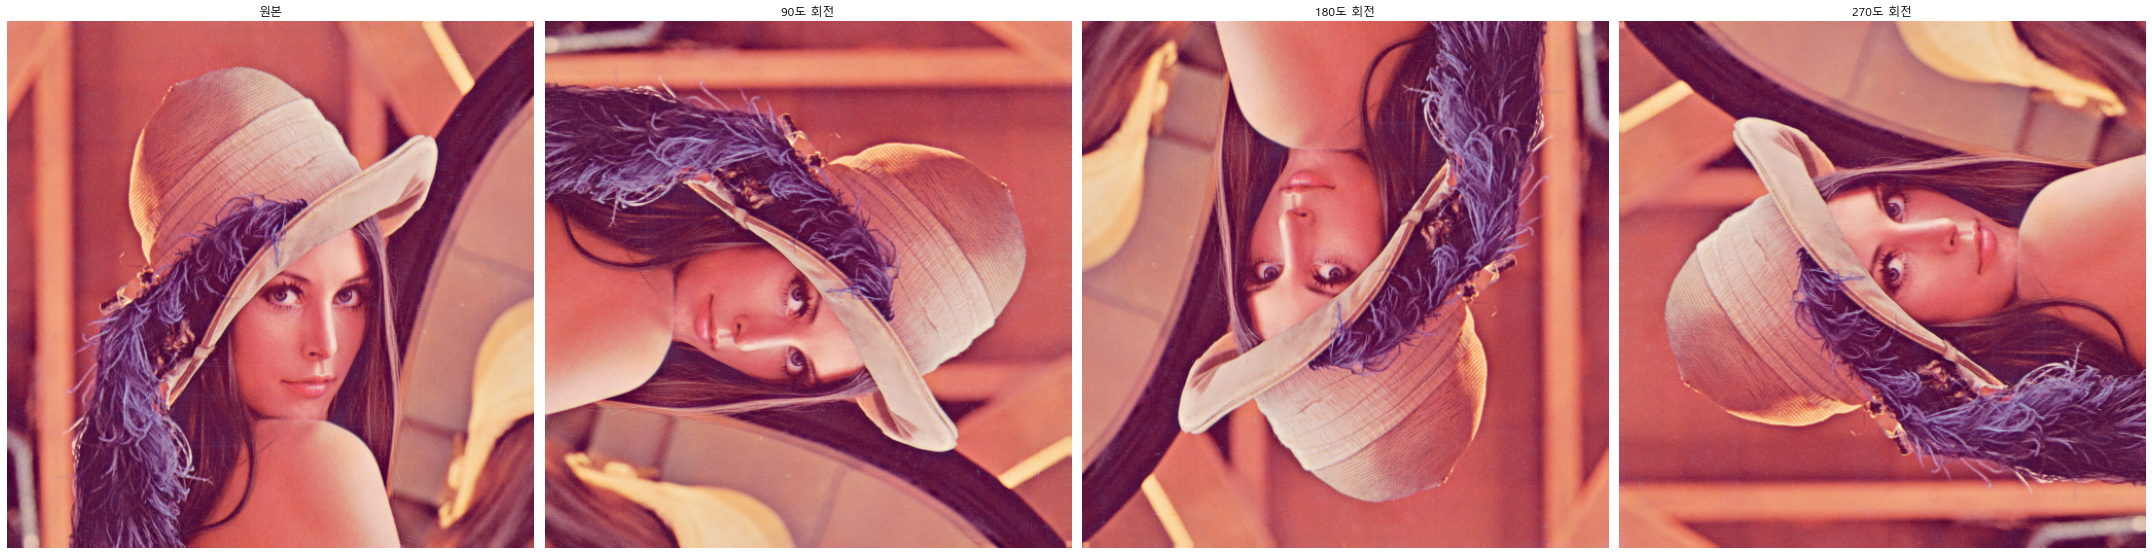

In [107]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,10))
row, col = 1, 4
plt.subplot(row, col, 1)
plt.imshow(lenna[:,:,::-1])
plt.title('원본')
plt.axis('off')

plt.subplot(row, col, 2)
plt.imshow(lenna_90[:,:,::-1])
plt.title('90도 회전')
plt.axis('off')

plt.subplot(row, col, 3)
plt.imshow(lenna_180[:,:,::-1])
plt.title('180도 회전')
plt.axis('off')

plt.subplot(row, col, 4)
plt.imshow(lenna_270[:,:,::-1])
plt.title('270도 회전')
plt.axis('off')

plt.tight_layout()
plt.show()

In [109]:
# 원하는 각도만큼 회전 - 각도: 양수 - 반시계 방향, 음수 - 시계방향
center_x, center_y = int(lenna.shape[1]/2), int(lenna.shape[0]/2) # 좌표 지정할 때 정수로 주는 습관!
print(center_x, center_y)

256 256


In [1]:
angle = 45 # 반시계방향 45도
# 회전에 사용할 affine 변환 행렬 생성
rot_m = cv2.getRotationMatrix2D((center_x, center_y), # 회전중심축 좌표
                                 angle,  # 회전각도
                                 2)
# print(rot_m)
lenna_45 = cv2.warpAffine(lenna, rot_m, (0,0))

cv2.imshow('45', lenna_45) # 가운데를 중심축으로, 반시계방향 45도 회전. 프레임은 그대로
cv2.waitKey(0)
cv2.destroyAllWindows()

NameError: name 'cv2' is not defined